In [2]:
!matplotlib inline
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np . random . seed ( 0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform (0 , 2*np.pi , half_n )
n = s*np.random.randn(half_n)
x , y = ( r + n)*np.cos(t) , ( r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n , 1) , y.reshape(half_n , 1)))
m, b = -1, 2
x = np . linspace(-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n , 1 ), y.reshape( half_n , 1 )))
X = np.vstack((X_circ , X_line))

'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


Text(0.5, 1.0, 'Original Data Points')

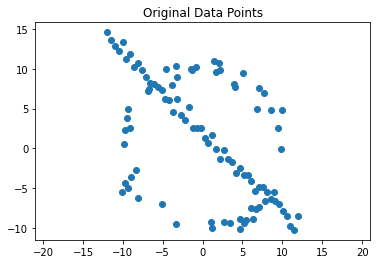

In [4]:
x_coordinates = X[:, 0]
y_coordinates = X[:, 1]
fig, ax = plt.subplots(1, 1)
ax.axis('equal')
ax.scatter(x_coordinates, y_coordinates)
ax.set_title('Original Data Points')

In [6]:
def evaluate_circle(x1, y1 ,x2, y2, x3, y3):
    x12 = x1 - x2
    x13 = x1 - x3
 
    x31 = x3 - x1
    x21 = x2 - x1

    y12 = y1 - y2
    y13 = y1 - y3
 
    y31 = y3 - y1
    y21 = y2 - y1

    sq_diff_x13 = x1**2 - x3**2
    sq_diff_y13 = y1**2 - y3**2
    sq_diff_x21 = x2**2 - x1**2
    sq_diff_y21 = y2**2 - y1**2

 
    h = -0.5* (sq_diff_x13*x12 + sq_diff_y13*x12 + sq_diff_x21*x13 + sq_diff_y21*x13)/(y31*x12 - y21*x13)
    k = -0.5* (sq_diff_x13*y12 + sq_diff_y13*y12 + sq_diff_x21*y13 + sq_diff_y21*y13)/(x31*y12 - x21*y13)
    c = -x1**2 - y1**2 + 2*h*x1 + 2*k*y1

    r = h**2 + k**2 - c

    return h, k, c

def RANSAC_circle(thresh_distant, thresh_inlinear, max_iterations, points ):
    import random
    import math
    iterations = 0
    short_list = []

    while iterations < max_iterations:
        iterations =+ 1

        point_index = random.sample(range(0, len(points)), 3)

        x1, y1 = points[point_index[0]]
        x2, y2 = points[point_index[1]]
        x3, y3 = points[point_index[2]]

        center_x, center_y, radius = evaluate_circle(x1, y1, x2, y2, x3, y3)

        min_r = max(radius-thresh_distant, 0)
        max_r = radius + thresh_distant

        num_inlinear_points = 0
        inlinear_arr = []

        for i, point in enumerate(points):
            if min_r < math.sqrt((point[0]-center_x)**2 + (point[1]-center_y)**2) < max_r: 
                inlinear_arr.append(point)
                num_inlinear_points += 1

        print(inlinear_arr)

        if (thresh_inlinear < num_inlinear_points):
            pass
        else:
            continue
        


        
print(evaluate_circle(1, 0, -1, 0, 0, 1))
    

(-0.0, 0.0, -1.0)
